In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [3]:
# function used
def f(x, y):
    return np.sin((x ** 2 + y ** 2))

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

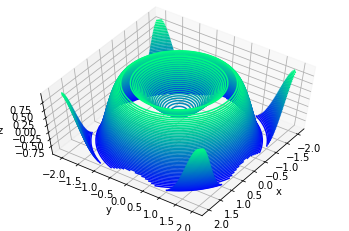

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='winter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)

In [5]:
def find_direction(X0, Y0, lr):
    # evaluate f function with lr step around (X0, Y0)
    results_z = []
    results_xy = []
    for step_x in [0, lr, -lr]:
        for step_y in [0, lr, -lr]:
            results_z.append(f(X0 + step_x, Y0 + step_y))
            results_xy.append([X0 + step_x, Y0 + step_y])
    min_idx = results_z.index(min(results_z))
    return results_xy[min_idx]

# Gradient Descent without momentum

In [6]:
max_iter = 300
lr = 0.1
X0 = 0
Y0 = -1
cur_iter = 0
steps_x = [X0]
steps_y = [Y0]
steps_z = [f(X0, Y0)]

while True:
    # get closer to a local min
    X1, Y1 = find_direction(X0, Y0, lr)
    # save step
    steps_x.append(X1)
    steps_y.append(Y1)
    steps_z.append(f(X1, Y1))
    # calculate step size
    step_size_x = abs(X0 - X1)
    step_size_y = abs(Y0 - Y1)
    # save new step
    X0 = X1
    Y0 = Y1
    if cur_iter > max_iter:
        print("Max iter reached")
        break
    if step_size_x < 0.00001 and step_size_y < 0.00001:
        print("Local min reached")
        break
    elif cur_iter%20 == 0:
        print("Iteration {} has x value ({},{})".format(cur_iter, X1, Y1))
    cur_iter = cur_iter + 1

Iteration 0 has x value (0,-0.9)
Local min reached


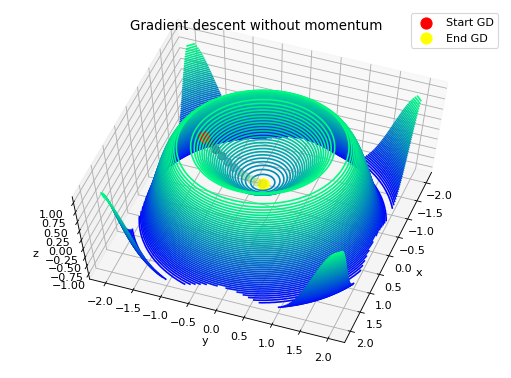

In [7]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
color = [item/255 for item in list(range(len(steps_x)))]
ax.scatter(steps_x, steps_y, steps_z, s=50, c=color)
ax.scatter(steps_x[0], steps_y[0], steps_z[0], s=100, c='red', label='Start GD')
ax.scatter(steps_x[-1], steps_y[-1], steps_z[-1], s=100, c='yellow', label='End GD')
ax.contour3D(X, Y, Z, 50, cmap='winter')
plt.title('Gradient descent without momentum')
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(65, 20)
fig.savefig('../plots/3D_GD_without_momentum.png')

# Gradient Descent with momentum

In [8]:
max_iter = 300
lr = 0.1
X0 = 0
Y0 = -1.2
cur_iter = 0
steps_x = [X0]
steps_y = [Y0]
steps_z = [f(X0, Y0)]

momentum = 0.99
last_m_taken = 8
moment_x = [0]
moment_y = [0]

while True:
    # get closer to a local min
    X1, Y1 = find_direction(X0, Y0, lr)
    grad_x = X0 - X1
    grad_y = Y0 - Y1
    moment_x.append(-grad_x)
    moment_y.append(-grad_y)
    moment_x = [momentum*x for x in moment_x]
    moment_y = [momentum*x for x in moment_y]
    m_x = sum(moment_x[-last_m_taken:])
    m_y = sum(moment_y[-last_m_taken:])
    X1 = X1 + m_x
    Y1 = Y1 + m_y
    # save step
    steps_x.append(X1)
    steps_y.append(Y1)
    steps_z.append(f(X1, Y1))
    # calculate step size
    step_size_x = abs(X0 - X1)
    step_size_y = abs(Y0 - Y1)
    # save new step
    X0 = X1
    Y0 = Y1
    if cur_iter > max_iter:
        print("Max iter reached")
        break
    if step_size_x < 0.0001 and step_size_y < 0.0001:
        print("Local min reached")
        break
    elif cur_iter%20 == 0:
        print("Iteration {} has x value ({},{})".format(cur_iter, X1, Y1))
    cur_iter = cur_iter + 1

Iteration 0 has x value (0.0,-1.001)
Iteration 20 has x value (0.0,0.201687724221572)
Iteration 40 has x value (1.6297525801278816,1.3673677304550633)
Iteration 60 has x value (1.9248699187699683,0.7150787050479814)
Iteration 80 has x value (2.127556935387068,0.7180470495706734)
Iteration 100 has x value (2.0216286878743674,0.8295181165364834)
Iteration 120 has x value (1.9072566199880503,0.9149025662672824)
Iteration 140 has x value (1.9103806240034256,0.8092261407000745)
Iteration 160 has x value (2.130566045337133,0.9122244685007734)
Iteration 180 has x value (2.024577916536425,0.8238114048298745)
Iteration 200 has x value (2.1100606762472145,0.9265194858743904)
Iteration 220 has x value (2.004480604291395,0.7120500911078814)
Iteration 240 has x value (1.9248699187698883,0.7150787050479814)
Iteration 260 has x value (2.127556935386988,0.7180470495706734)
Iteration 280 has x value (2.0216286878742875,0.8295181165364834)
Iteration 300 has x value (1.9072566199879704,0.9149025662672824

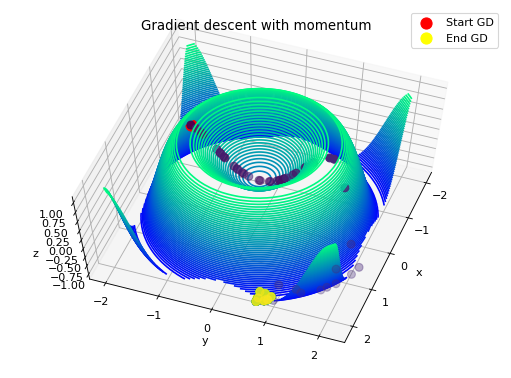

In [9]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
color = [item/255 for item in list(range(len(steps_x)))]
ax.scatter(steps_x[0], steps_y[0], steps_z[0], s=100, c='red', label='Start GD')
ax.scatter(steps_x[-1], steps_y[-1], steps_z[-1], s=100, c='yellow', label='End GD')
ax.scatter(steps_x, steps_y, steps_z, s=50, c=color)
ax.contour3D(X, Y, Z, 50, cmap='winter')
plt.title('Gradient descent with momentum')
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(65, 20)
fig.savefig('../plots/3D_GD_with_momentum.png')